# Gráfico de barras

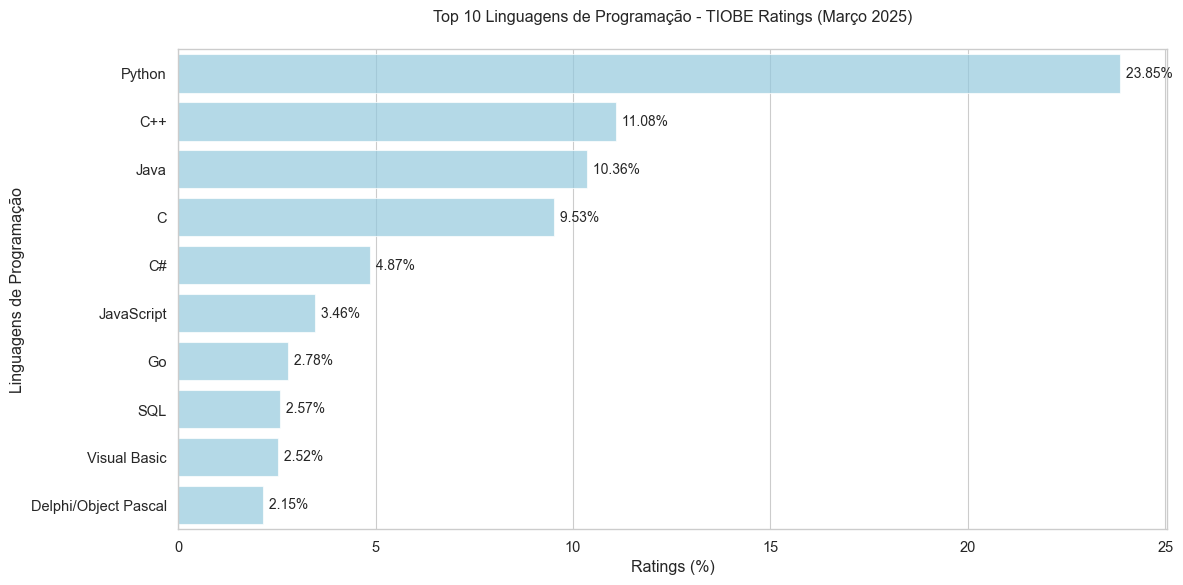

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configurações iniciais
sns.set_style("whitegrid")
sns.set_context("paper", font_scale=1.2)

# Carregar dados
df = pd.read_csv("https://raw.githubusercontent.com/toUpperCase78/tiobe-index-ratings/master/Tiobe_Index_March2025.csv")
df_top10 = df.head(10)

# Criar gráfico
plt.figure(figsize=(12, 6))
ax = sns.barplot(
    x="Ratings(%)",
    y="Programming Language",
    data=df_top10,
    color='skyblue',
    alpha=0.7,
)

# Adicionar valores manualmente
for i, v in enumerate(df_top10['Ratings(%)']):
    ax.text(v + 0.05, i, f' {v:.2f}%', 
            va='center', ha='left', fontsize=10)

# Configurações finais
plt.title("Top 10 Linguagens de Programação - TIOBE Ratings (Março 2025)", pad=20)
plt.xlabel("Ratings (%)")
plt.ylabel("Linguagens de Programação")
plt.tight_layout()
plt.show()

# Gráfico interativo com Plotly

In [4]:
import pandas as pd
import plotly.express as px
from pathlib import Path

# Definição de constantes
CONFIG = {
    'token_mapbox': "pk.eyJ1IjoiamFja2x1byIsImEiOiJjaWxsc29saWQtd2l0aCIsInBpcG1lbnR1aWQiOjFlNjUxMzM3NDAxNjQ0NjIwMDAyZjRlZDc5Y2Y3ZjUxZiJ9.D9myT4WEUfT70CAZqKjQ5w",
    'url_dados': "https://raw.githubusercontent.com/toUpperCase78/tiobe-index-ratings/master/Tiobe_Index_March2025.csv",
    'largura': 1000,
    'altura': 600,
    'margens': {'l': 150, 'r': 50, 't': 100, 'b': 50}
}

def criar_grafico_interativo():
    """Cria um gráfico interativo das top 10 linguagens de programação."""
    try:
        # Configurar ambiente
        px.set_mapbox_access_token(CONFIG['token_mapbox'])
        
        # Carregar dados
        df = pd.read_csv(CONFIG['url_dados'])
        df_top10 = df.head(10)
        
        # Criar gráfico
        fig = px.bar(
            df_top10,
            x="Ratings(%)",
            y="Programming Language",
            orientation="h",
            title="Top 10 Linguagens de Programação - TIOBE Ratings (Março 2025)",
            template="plotly_white",
            width=CONFIG['largura'],
            height=CONFIG['altura']
        )
        
        # Configurar layout
        fig.update_layout(
            xaxis_title="Ratings (%)",
            yaxis_title="Linguagens de Programação",
            showlegend=False,
            margin=CONFIG['margens']
        )
        
        # Adicionar valores sobre as barras
        fig.update_traces(
            text=df_top10['Ratings(%)'],
            texttemplate='%{text}%',
            textposition='outside'
        )
        
        return fig
        
    except Exception as e:
        print(f"Erro ao criar o gráfico: {str(e)}")
        return None

# Executar
grafico = criar_grafico_interativo()
if grafico:
    grafico.show()

# Gráfico Análise Temporal

In [7]:
import pandas as pd
import plotly.express as px
from pathlib import Path
from typing import Optional, Tuple

# Definição de constantes
CONFIG = {
    'dados_2024': [
        {"Linguagem": "Python", "Rating Mar24": 15.63},
        {"Linguagem": "C", "Rating Mar24": 11.17},
        {"Linguagem": "C++", "Rating Mar24": 10.70},
        {"Linguagem": "Java", "Rating Mar24": 8.95},
        {"Linguagem": "C#", "Rating Mar24": 7.54},
        {"Linguagem": "JavaScript", "Rating Mar24": 3.38},
        {"Linguagem": "SQL", "Rating Mar24": 1.92},
        {"Linguagem": "Go", "Rating Mar24": 1.56},
        {"Linguagem": "Visual Basic", "Rating Mar24": 1.42},
        {"Linguagem": "Delphi/Object Pascal", "Rating Mar24": 1.22}
    ],
    'url_2025': "https://raw.githubusercontent.com/toUpperCase78/tiobe-index-ratings/master/Tiobe_Index_March2025.csv",
    'colunas_2025': ["Programming Language", "Ratings(%)"],
    'colunas_renomear': {
        'Programming Language': 'Linguagem',
        'Ratings(%)': 'Rating Mar25'
    }
}

def carregar_dados_2025() -> Optional[pd.DataFrame]:
    """Carrega e processa os dados de Março de 2025."""
    try:
        df = pd.read_csv(CONFIG['url_2025'])
        df_slim = df[CONFIG['colunas_2025']].copy()
        df_slim.rename(columns=CONFIG['colunas_renomear'], inplace=True)
        return df_slim
    except Exception as e:
        print(f"Erro ao carregar os dados de Março de 2025: {e}")
        return None

def criar_dataframe_comparacao(df_2025: Optional[pd.DataFrame]) -> Optional[pd.DataFrame]:
    """Cria DataFrame comparativo entre 2024 e 2025."""
    if df_2025 is None:
        return None
        
    df_2024 = pd.DataFrame(CONFIG['dados_2024'])
    df_comparacao = pd.merge(df_2025, df_2024, on='Linguagem', how='inner')
    return df_comparacao.sort_values(by='Rating Mar25', ascending=False)

def criar_grafico_comparativo(df_comparacao: Optional[pd.DataFrame]) -> None:
    """Cria e exibe o gráfico comparativo."""
    if df_comparacao is None:
        print("\nNão foi possível gerar o gráfico devido a erros no processamento dos dados.")
        return

    df_melted = df_comparacao.melt(
        id_vars=["Linguagem"],
        value_vars=["Rating Mar25", "Rating Mar24"],
        var_name="Ano",
        value_name="Rating"
    )

    fig = px.bar(
        df_melted,
        x="Linguagem",
        y="Rating",
        color="Ano",
        barmode="group",
        title="Top Linguagens de Programação - TIOBE Ratings (Março 2025 vs Março 2024) - Ordenado por Rating de 2025",
        labels={
            "Rating": "Rating(%)",
            "Linguagem": "Linguagem de Programação",
            "Ano": "Ano"
        }
    )
    
    # Adicionar valores sobre as barras
    fig.update_traces(
        texttemplate='%{y}%',
        textposition='outside'
    )
    
    fig.show()

# Executar análise
df_2025 = carregar_dados_2025()
df_comparacao = criar_dataframe_comparacao(df_2025)
criar_grafico_comparativo(df_comparacao)

# Gráfico Circular (Pie Chart) com Plotly

In [8]:
import pandas as pd
import plotly.express as px

try:
    # Criar gráfico com configurações básicas
    fig_pie = px.pie(
        df.head(10),
        names='Programming Language',
        values='Ratings(%)',
        title='Distribuição das Ratings das 10 Principais Linguagens (Março 2025)',
        labels={'Programming Language': 'Linguagem'}
    )
    
    # Adicionar informações nas fatias
    fig_pie.update_traces(textinfo='percent+label')
    
    # Ajustar layout
    fig_pie.update_layout(
        width=800,
        height=600,
        showlegend=True,
        legend=dict(
            orientation="h",
            yanchor="bottom",
            y=-0.3,
            xanchor="right",
            x=1
        )
    )
    
    fig_pie.show()
    
except Exception as e:
    print(f"Erro ao criar o gráfico: {str(e)}")

# Subplots

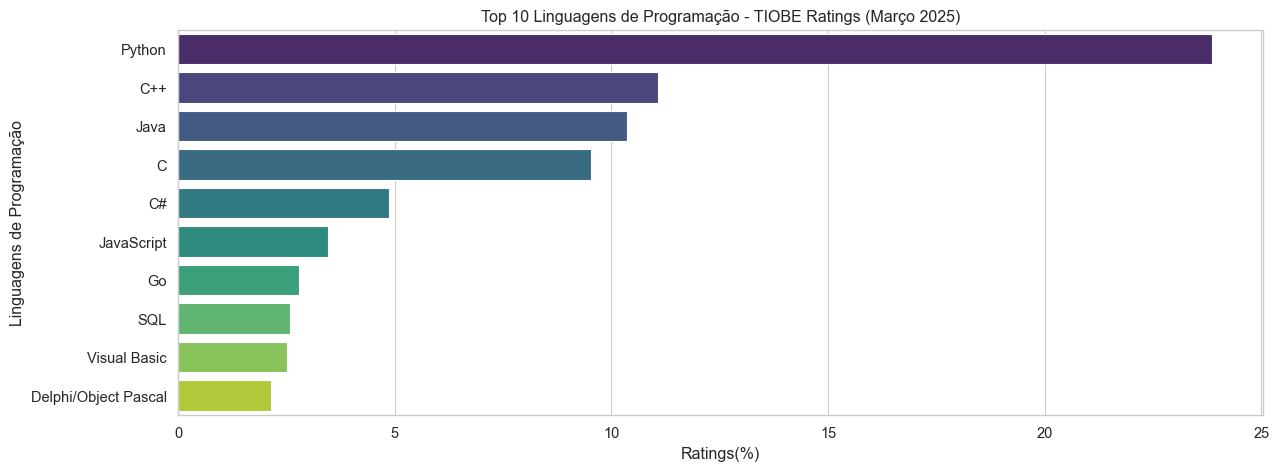

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.tools as tls

# URL do dataset TIOBE ratings
url = "https://raw.githubusercontent.com/toUpperCase78/tiobe-index-ratings/master/Tiobe_Index_March2025.csv"

df = pd.read_csv(url)

df_top10 = df.head(10)

# Gráfico de barras com Seaborn (Mostrar separadamente)
plt.figure(figsize=(14, 5))
ax_seaborn = sns.barplot(x="Ratings(%)", y="Programming Language", data=df_top10,
                         hue="Programming Language", palette="viridis", dodge=False)
leg_seaborn = ax_seaborn.get_legend()
if leg_seaborn is not None:
    leg_seaborn.remove()
plt.title("Top 10 Linguagens de Programação - TIOBE Ratings (Março 2025)")
plt.xlabel("Ratings(%)")
plt.ylabel("Linguagens de Programação")
plt.show()

# Gráfico Circular com Plotly (Mostrar separadamente)
fig_pie = px.pie(df_top10, names='Programming Language', values='Ratings(%)',
                 title='Distribuição das Ratings das 10 Principais Linguagens (Março 2025)',
                 labels={'Programming Language': 'Linguagem'})
fig_pie.update_traces(textinfo='percent+label')
fig_pie.show()


dados_2024 = [
        {"Linguagem": "Python", "Rating Mar24": 15.63},
        {"Linguagem": "C", "Rating Mar24": 11.17},
        {"Linguagem": "C++", "Rating Mar24": 10.70},
        {"Linguagem": "Java", "Rating Mar24": 8.95},
        {"Linguagem": "C#", "Rating Mar24": 7.54},
        {"Linguagem": "JavaScript", "Rating Mar24": 3.38},
        {"Linguagem": "SQL", "Rating Mar24": 1.92},
        {"Linguagem": "Go", "Rating Mar24": 1.56},
        {"Linguagem": "Visual Basic", "Rating Mar24": 1.42},
        {"Linguagem": "Delphi/Object Pascal", "Rating Mar24": 1.22}
]

df_2024_slim = pd.DataFrame(dados_2024)

# URL do dataset TIOBE ratings de Março de 2025
url_2025 = "https://raw.githubusercontent.com/toUpperCase78/tiobe-index-ratings/master/Tiobe_Index_March2025.csv"

# Carregar os dados de Março de 2025
try:
    df_2025_comparativo = pd.read_csv(url_2025)
    df_2025_slim_comparativo = df_2025_comparativo[["Programming Language", "Ratings(%)"]].copy()
    df_2025_slim_comparativo.rename(columns={'Programming Language': 'Linguagem', 'Ratings(%)': 'Rating Mar25'}, inplace=True)
except Exception as e:
    print(f"Erro ao carregar os dados de Março de 2025 para comparação: {e}")
    df_2025_slim_comparativo = None

# Juntar os DataFrames para comparação
if df_2025_slim_comparativo is not None and df_2024_slim is not None:
    df_comparacao = pd.merge(df_2025_slim_comparativo, df_2024_slim, on='Linguagem', how='inner')

    # Ordenar pela classificação de Março de 2025
    df_ordenado = df_comparacao.sort_values(by='Rating Mar25', ascending=False)

    # Aplicar melt ao DataFrame ordenado
    df_melted_ordenado = df_ordenado.melt(id_vars=["Linguagem"], value_vars=["Rating Mar25", "Rating Mar24"],
                                         var_name="Ano", value_name="Rating")

    # Criar o gráfico de barras comparativo (Mostrar separadamente)
    fig_comparativo = px.bar(df_melted_ordenado, x="Linguagem", y="Rating", color="Ano", barmode="group",
                              title="Comparação das Ratings (Março 2025 vs Março 2024)",
                              labels={"Rating": "Rating(%)", "Linguagem": "Linguagem de Programação", "Ano": "Ano"})
    fig_comparativo.show()
else:
    print("\nNão foi possível gerar o gráfico comparativo devido a erros no carregamento dos dados.")

# Gráfico de Caule

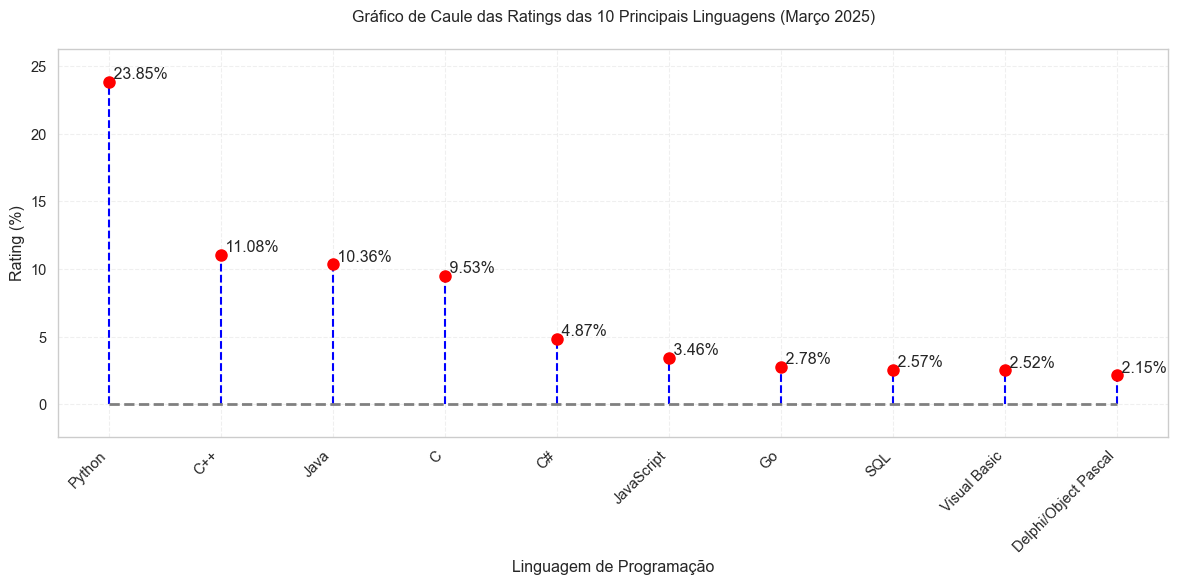

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Definição de constantes
CONFIG = {
    'tamanho': (12, 6),
    'titulo': 'Gráfico de Caule das Ratings das 10 Principais Linguagens (Março 2025)',
    'cores': {
        'linha': '--',
        'marcador': 'o',
        'base': '-',
        'cor_base': 'gray',
        'cor_linha': 'blue',
        'cor_marcador': 'red'
    },
    'rotacao': 45,
    'espacamento': 0.1
}

def criar_grafico_caule(df: pd.DataFrame) -> None:
    """Cria e exibe um gráfico de caule das 10 principais linguagens de programação."""
    try:
        # Criar figura com dimensões configuráveis
        plt.figure(figsize=CONFIG['tamanho'])
        
        # Criar gráfico de caule com personalização avançada
        markerline, stemlines, baseline = plt.stem(
            df.head(10)['Programming Language'],
            df.head(10)['Ratings(%)'],
            linefmt=CONFIG['cores']['linha'],
            markerfmt=CONFIG['cores']['marcador'],
            basefmt=f"{CONFIG['cores']['base']}-"
        )
        
        # Personalizar aparência
        plt.setp(markerline, color=CONFIG['cores']['cor_marcador'], markersize=8)
        plt.setp(stemlines, color=CONFIG['cores']['cor_linha'], linewidth=1.5)
        plt.setp(baseline, color=CONFIG['cores']['cor_base'], linewidth=2)
        
        # Configurar título e rótulos
        plt.title(CONFIG['titulo'], pad=20)
        plt.xlabel('Linguagem de Programação')
        plt.ylabel('Rating (%)')
        
        # Ajustar visualização
        plt.xticks(rotation=CONFIG['rotacao'], ha='right')
        plt.margins(y=CONFIG['espacamento'])
        plt.grid(True, alpha=0.3, linestyle='--')
        
        # Adicionar valores sobre os marcadores
        for i, v in enumerate(df.head(10)['Ratings(%)']):
            plt.text(i, v, f' {v:.2f}%', va='bottom')
        
        plt.tight_layout()
        plt.show()
        
    except Exception as e:
        print(f"Erro ao criar o gráfico: {str(e)}")

# Executar
if 'df' in locals():
    criar_grafico_caule(df)

# Gráfico de Área em Pilha ("Stack Plot")

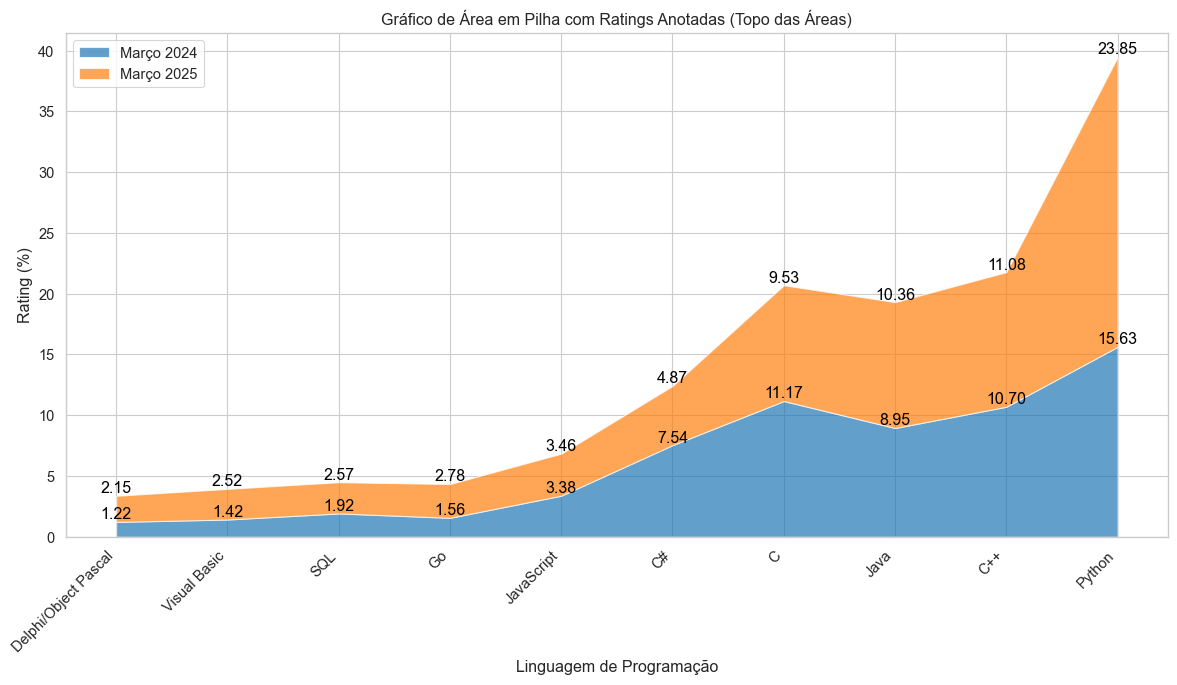

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

dados_2024 = [
    {"Linguagem": "Python", "Rating Mar24": 15.63},
    {"Linguagem": "C", "Rating Mar24": 11.17},
    {"Linguagem": "C++", "Rating Mar24": 10.70},
    {"Linguagem": "Java", "Rating Mar24": 8.95},
    {"Linguagem": "C#", "Rating Mar24": 7.54},
    {"Linguagem": "JavaScript", "Rating Mar24": 3.38},
    {"Linguagem": "SQL", "Rating Mar24": 1.92},
    {"Linguagem": "Go", "Rating Mar24": 1.56},
    {"Linguagem": "Visual Basic", "Rating Mar24": 1.42},
    {"Linguagem": "Delphi/Object Pascal", "Rating Mar24": 1.22}
]
df_2024_slim = pd.DataFrame(dados_2024).set_index('Linguagem')

url_2025 = "https://raw.githubusercontent.com/toUpperCase78/tiobe-index-ratings/master/Tiobe_Index_March2025.csv"
df_2025 = pd.read_csv(url_2025)
df_2025_slim = df_2025.head(10).set_index('Programming Language')[['Ratings(%)']]
df_2025_slim.rename(columns={'Ratings(%)': 'Rating Mar25'}, inplace=True)

# Juntar os DataFrames
df_stack = df_2024_slim.join(df_2025_slim, how='inner')

# Ordenar o DataFrame pelo Rating de Março de 2025
df_stack_ordenado = df_stack.sort_values(by='Rating Mar25', ascending=True)

linguagens = df_stack_ordenado.index
ratings_2024 = df_stack_ordenado['Rating Mar24'].values
ratings_2025 = df_stack_ordenado['Rating Mar25'].values

# Criar o gráfico de área em pilha com os dados ordenados
plt.figure(figsize=(12, 7))
plt.stackplot(linguagens, ratings_2024, ratings_2025, labels=['Março 2024', 'Março 2025'], alpha=0.7)

# Adicionar anotações para Março de 2024 (no topo da primeira área)
for i, val in enumerate(ratings_2024):
    plt.text(linguagens[i], val, f'{val:.2f}', ha='center', va='bottom', color='black')

# Adicionar anotações para Março de 2025 (no topo da segunda área)
for i, val in enumerate(ratings_2025):
    plt.text(linguagens[i], ratings_2024[i] + val, f'{val:.2f}', ha='center', va='bottom', color='black')

plt.title('Gráfico de Área em Pilha com Ratings Anotadas (Topo das Áreas)')
plt.xlabel('Linguagem de Programação')
plt.ylabel('Rating (%)')
plt.legend(loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Gráfico de Dispersão ("Scatter Plot")

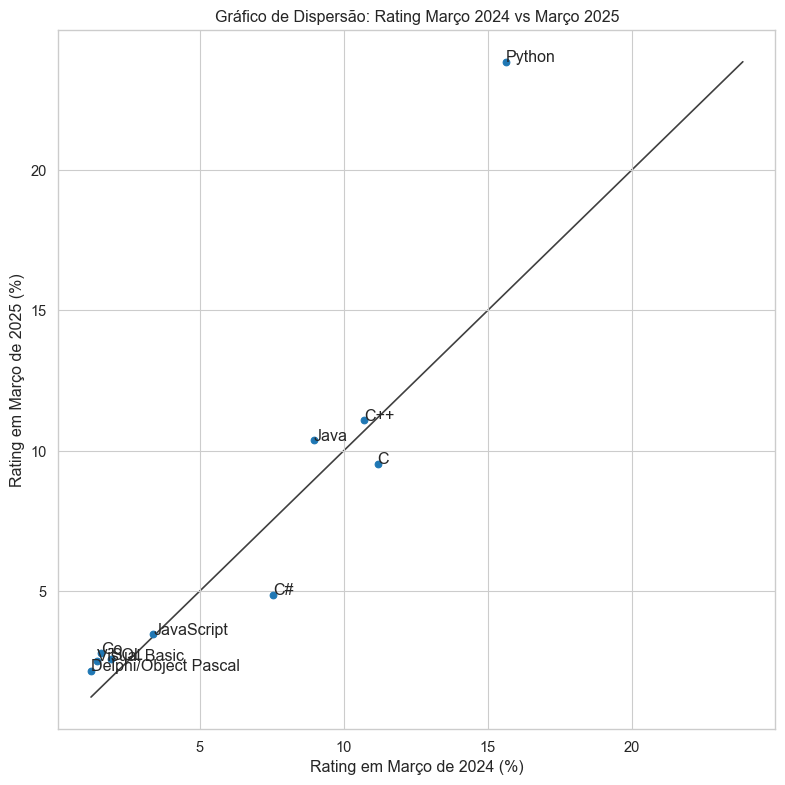

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Os DataFrames df_2024_slim e df_2025_slim já estão definidos

# Juntar os DataFrames para o gráfico de dispersão
df_scatter = df_2024_slim.rename(columns={'Rating Mar24': 'Rating_2024'}).join(
    df_2025_slim.rename(columns={'Rating Mar25': 'Rating_2025'}), how='inner'
)

# Criar o gráfico de dispersão
plt.figure(figsize=(8, 8))
plt.scatter(df_scatter['Rating_2024'], df_scatter['Rating_2025'])
plt.title('Gráfico de Dispersão: Rating Março 2024 vs Março 2025')
plt.xlabel('Rating em Março de 2024 (%)')
plt.ylabel('Rating em Março de 2025 (%)')
for i, row in df_scatter.iterrows():
    plt.annotate(i, (row['Rating_2024'], row['Rating_2025'])) 

# Adicionar linha de referência y=x
lims = [
    max(df_scatter['Rating_2024'].max(), df_scatter['Rating_2025'].max()),
    min(df_scatter['Rating_2024'].min(), df_scatter['Rating_2025'].min()),
]
plt.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
plt.grid(True)
plt.tight_layout()
plt.show()

# Gráfico de Barras Comparativo usando Cufflinks

In [21]:
import pandas as pd
import cufflinks as cf
import plotly.graph_objects as go

cf.go_offline()
cf.set_config_file(theme='pearl', sharing='public')

dados_2024 = [
    {"Linguagem": "Python", "Rating Mar24": 15.63},
    {"Linguagem": "C", "Rating Mar24": 11.17},
    {"Linguagem": "C++", "Rating Mar24": 10.70},
    {"Linguagem": "Java", "Rating Mar24": 8.95},
    {"Linguagem": "C#", "Rating Mar24": 7.54},
    {"Linguagem": "JavaScript", "Rating Mar24": 3.38},
    {"Linguagem": "SQL", "Rating Mar24": 1.92},
    {"Linguagem": "Go", "Rating Mar24": 1.56},
    {"Linguagem": "Visual Basic", "Rating Mar24": 1.42},
    {"Linguagem": "Delphi/Object Pascal", "Rating Mar24": 1.22}
]

df_2024_slim = pd.DataFrame(dados_2024)

url_2025 = "https://raw.githubusercontent.com/toUpperCase78/tiobe-index-ratings/master/Tiobe_Index_March2025.csv"
df_2025 = pd.read_csv(url_2025)

# Verificar se os dados foram carregados corretamente
print("\nDados 2025 carregados:")
print(df_2025.head())
print("\nColunas disponíveis:")
print(df_2025.columns.tolist())

df_2025_slim = df_2025[["Programming Language", "Ratings(%)"]].head(10).rename(
    columns={'Programming Language': 'Linguagem', 'Ratings(%)': 'Rating Mar25'}
)

df_comparacao_cufflinks = pd.merge(df_2025_slim, df_2024_slim, on='Linguagem', how='inner')

print("\nDados após merge:")
print(df_comparacao_cufflinks.head())
print("\nTipos de dados:")
print(df_comparacao_cufflinks.dtypes)

# Cria o gráfico Plotly Graph Objects diretamente
fig = go.Figure(data=[
    go.Bar(name='Março 2025', x=df_comparacao_cufflinks['Linguagem'], 
           y=df_comparacao_cufflinks['Rating Mar25']),
    go.Bar(name='Março 2024', x=df_comparacao_cufflinks['Linguagem'], 
           y=df_comparacao_cufflinks['Rating Mar24'])
])

# Configura o layout
fig.update_layout(
    barmode='group',
    title='Comparação das Ratings (Março 2025 vs Março 2024)',
    xaxis_title='Linguagem de Programação',
    yaxis_title='Rating (%)',
    template='plotly_white',
    width=1200,
    height=600,
    legend=dict(yanchor="bottom", y=-0.3, xanchor="center", x=0.5)
)

fig.show()


Dados 2025 carregados:
  Programming Language  Mar 2025  Mar 2024  Ratings(%)  Change(%)
0               Python         1         1       23.85       8.22
1                  C++         2         3       11.08       0.37
2                 Java         3         4       10.36       1.41
3                    C         4         2        9.53      -1.64
4                   C#         5         5        4.87      -2.67

Colunas disponíveis:
['Programming Language', 'Mar 2025', 'Mar 2024', 'Ratings(%)', 'Change(%)']

Dados após merge:
  Linguagem  Rating Mar25  Rating Mar24
0    Python         23.85         15.63
1       C++         11.08         10.70
2      Java         10.36          8.95
3         C          9.53         11.17
4        C#          4.87          7.54

Tipos de dados:
Linguagem        object
Rating Mar25    float64
Rating Mar24    float64
dtype: object


# Heatmap

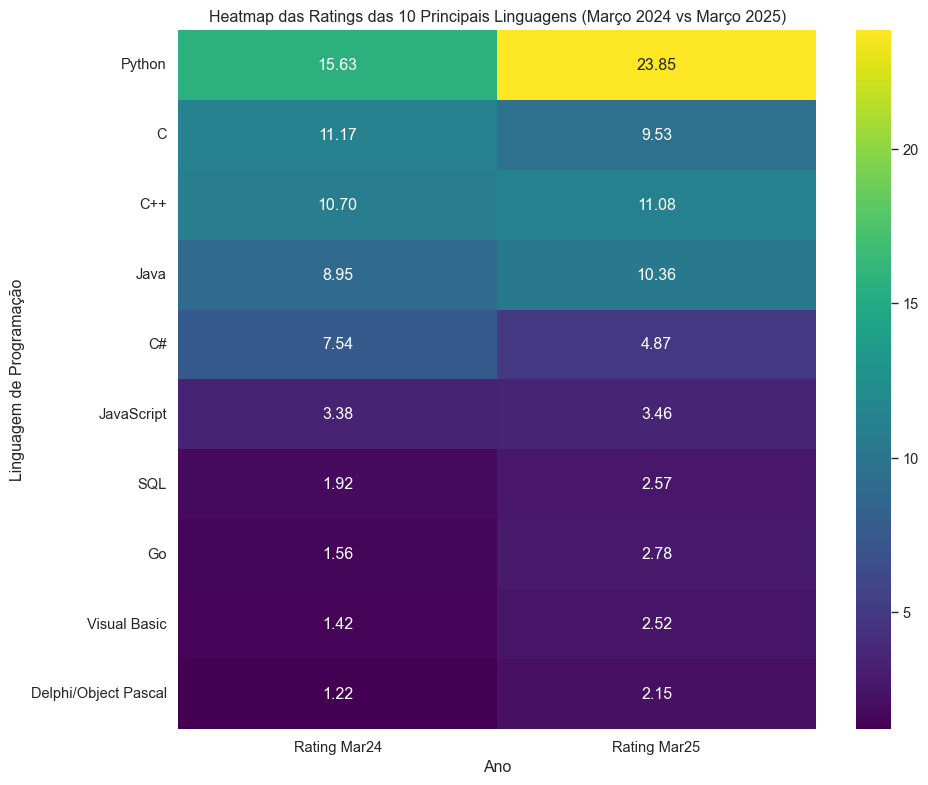

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

dados_2024 = [
    {"Linguagem": "Python", "Rating Mar24": 15.63},
    {"Linguagem": "C", "Rating Mar24": 11.17},
    {"Linguagem": "C++", "Rating Mar24": 10.70},
    {"Linguagem": "Java", "Rating Mar24": 8.95},
    {"Linguagem": "C#", "Rating Mar24": 7.54},
    {"Linguagem": "JavaScript", "Rating Mar24": 3.38},
    {"Linguagem": "SQL", "Rating Mar24": 1.92},
    {"Linguagem": "Go", "Rating Mar24": 1.56},
    {"Linguagem": "Visual Basic", "Rating Mar24": 1.42},
    {"Linguagem": "Delphi/Object Pascal", "Rating Mar24": 1.22}
]
df_2024_slim = pd.DataFrame(dados_2024).set_index('Linguagem')

url_2025 = "https://raw.githubusercontent.com/toUpperCase78/tiobe-index-ratings/master/Tiobe_Index_March2025.csv"
df_2025 = pd.read_csv(url_2025)
df_2025_slim = df_2025.head(10).set_index('Programming Language')[['Ratings(%)']]
df_2025_slim.rename(columns={'Ratings(%)': 'Rating Mar25'}, inplace=True)


df_heatmap = df_2024_slim.join(df_2025_slim, how='inner')

# Cria o heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df_heatmap, annot=True, cmap='viridis', fmt=".2f")
plt.title('Heatmap das Ratings das 10 Principais Linguagens (Março 2024 vs Março 2025)')
plt.ylabel('Linguagem de Programação')
plt.xlabel('Ano')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()